In [1]:
import math
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [2]:

def get_meta_entity(meta, metadata_entities):
    cur_authors =  meta["Authors"].split(",")
    cur_titles = []
    cur_edges = []
    cur_titel = []
    for author in cur_authors:
        cur_titles.append(meta["Titles"])
        cur_edges.append("verfasst von")
 
    curResult = pd.DataFrame({'source': cur_authors, 'target': cur_titles, 'edge': cur_edges})
    #curResult soll gleiche Menge an Daten erhalten
    #die da aussehen: source:"Author", target: cur_authors, edge: "ist"
    curSource_autor = ["Author" for i in range(len(cur_titles))] #einzeilige for-schleife, um daten zu generieren
    curEdge_autor = ["ist" for i in range(len(cur_titles))] #same here
    
    curResult2 = pd.DataFrame({'source': curSource_autor, 'target': cur_authors, 'edge': curEdge_autor})
    #dasselbe für: source:"Paper", target: cur_titles, edge: "ist"
    curSource_titel = ["Paper" for i in range(len(cur_titles))] #einzeilige for-schleife, um daten zu generieren
    curEdge_titel = ["ist" for i in range(len(cur_titles))] #same here
    
    curResult3 = pd.DataFrame({'source': curSource_titel, 'target': cur_titles, 'edge': curEdge_titel})
    
    metadata_entities = pd.concat([metadata_entities, curResult, curResult2, curResult3])
    
    return metadata_entities

In [3]:
metadata_csv = pd.read_excel('C:/Users/Jana/OneDrive/Dokumente/Desktop/Uni/Master/Thesis/PaperDatenextraktion/metadata_list.xlsx')
metadata_entities = pd.DataFrame()


for i in range(len(metadata_csv)):
    metadata_entities = get_meta_entity(metadata_csv.iloc[i], metadata_entities)


In [4]:
# create a directed-graph from a dataframe
G_Meta=nx.from_pandas_edgelist(metadata_entities, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

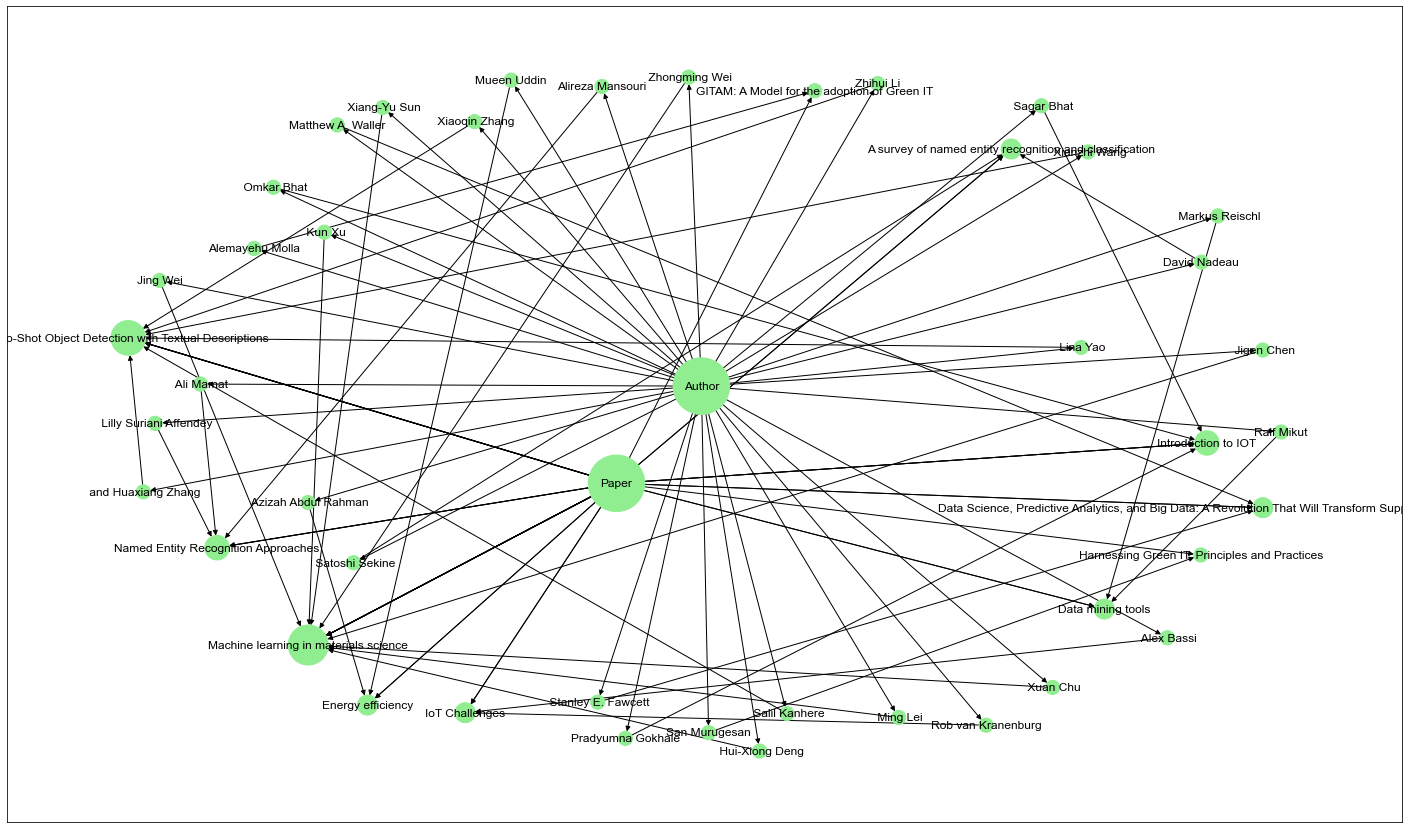

In [5]:
plt.figure(figsize=(25,15))

pos = nx.spring_layout(G_Meta, k=10/math.sqrt(G_Meta.order()))
d = dict(G_Meta.degree)
#edge_cmap=plt.cm.Blues
#weight='weight'
nx.draw_networkx(G_Meta, with_labels=True, pos=pos, node_size=[v * 100 for v in d.values()], node_color='lightgreen', font_family = 'Arial')
plt.show()